In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
d = pd.read_csv('creditcard.csv', low_memory=False)
d = d.sample(frac=1).reset_index(drop=True)
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,26460.0,1.232597,0.186076,0.067309,0.520084,-0.136409,-0.849080,0.294565,-0.217949,-0.037575,...,-0.512222,-1.629315,0.170361,-0.165849,0.140669,-0.100924,-0.052315,0.019095,40.04,0
1,69299.0,-2.758636,-1.244619,0.788168,-0.191232,2.326993,-0.801576,-0.819418,0.835199,-0.832605,...,0.017331,-1.030537,-0.289912,-1.197674,0.262656,0.073492,-0.078536,-0.387105,1.98,0
2,114639.0,1.986269,0.063106,-1.051288,1.482359,0.090608,-0.729863,0.233495,-0.294311,0.563371,...,0.187209,0.900077,-0.055743,0.036777,0.449818,-0.373646,0.022495,-0.052735,10.00,0
3,37512.0,1.106922,0.120453,0.202674,1.113945,-0.183392,-0.493955,0.165934,-0.074572,0.060515,...,0.077930,0.168294,-0.105275,0.073204,0.577401,-0.301970,0.017279,0.024172,52.92,0
4,87812.0,-0.659294,0.870027,-0.220403,-0.706610,0.567441,-0.642952,0.616464,0.391532,-0.486628,...,-0.054639,-0.168705,0.083644,-0.380730,-0.800551,0.159273,0.267814,0.164656,18.52,0


In [3]:
Fraud = d.loc[d['Class'] == 1]
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
237,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
817,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
1203,49985.0,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,360.00,1
2255,8528.0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00,1
2288,59385.0,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.98,1


In [4]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [6]:
X = d.iloc[:,:-1]
y = d['Class']

data = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=42)

In [8]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

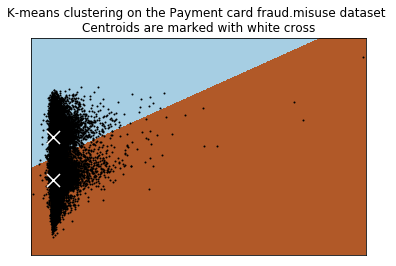

In [10]:
h = .02     

x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Payment card fraud.misuse dataset \n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
predictions = kmeans.predict(X_test)
pred = np.where(predictions == 1)[0]
real = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred, real))
pred2 = np.where(predictions == 0)[0]
real2 = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred2, real2))
false_pos_rate = false_pos/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)


print("FNR (with respect to Error-rate): ", 1 - false_pos_rate)
print("FNR (with respect to total data): ", false_neg / len(predictions))
print(false_neg, false_pos, false_neg + false_pos)
print(len(X_test))
print(X_test.size)

Accuracy: 0.4520731590539117
FNR (with respect to Error-rate):  0.00099032972154256
FNR (with respect to total data):  0.0005426282358198475
51 51447 51498
93987
187974
